<a href="https://colab.research.google.com/github/milaml/VNP/blob/master/LabNaCas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.ebay.com/b/Apple-Cell-Phone-Cases-and-Covers/20349/bn_319677")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [44.7 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [556 kB]
Get:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,009 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://ppa.launchpadcontent.net/c2d4u.te

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
requests.packages.urllib3.disable_warnings
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from selenium.webdriver.common.by import By

In [ ]:
naslov = wd.find_elements(By.CLASS_NAME, 's-item__title')

ratings = wd.find_elements(By.CLASS_NAME, 'b-rating__rating-count')
prices = wd.find_elements(By.CLASS_NAME, 's-item__price')

In [ ]:
naslovEbay = []
for ime in naslov:
  naslovEbay.append(ime.text)

naslovEbay

['Cover For iPhone 12 Pro Max 12 Offical Apple Leather Phone Case with MagSafe',
 'For iPhone 13 Pro 13 Pro Max Original Apple Leather Phone Case W/ Magsafe',
 '2023 For iPhone 15 Pro 15Plus 15 Pro Max Official Silicone Case with MagSafe',
 'OEM Genuine Apple iPhone 12 13 14 PRO PLUS MAX Silicone Case Open box - U Pick!!',
 'NEW Apple AirTag 1 Apple Air Tag for iPhone iPAD MX532AM/A Fast Shipping 🍎',
 'Genuine Apple Silicone Soft Case with MagSafe for Apple iPhone 14 Pro Max 6.7"',
 'For iPhone 13 Pro 13 Pro Max Original Apple Leather Phone Case W/ Magsafe',
 'Genuine Apple Silicone Soft Case with MagSafe for Apple iPhone 14 Pro 6.1"',
 'Apple Liquid Silicone Phone Case With MagSafe For iPhone 14/14 Pro Max/14 Plus',
 'Genuine Apple iPhone Leather Wallet with MagSafe (2020) MHLR3ZM/A - Black',
 'Genuine Apple Magsafe Leather Wallet 1st Gen For iPhone 12 13 Mini 14 15 Pro Max',
 'New Apple AirTag GPS Tracker - Silver (MX532AM/A)',
 'Original Liquid Silicone Phone Case With MagSafe For i

In [ ]:
ratingList= []
for rating in ratings:
  rate = rating.text.split('\n')[0].replace('(', '').replace(')', '')
  ratingList.append(rate)
  ratingList


In [ ]:
ratingList

['111',
 '26',
 '49',
 '2',
 '18',
 '25',
 '22',
 '5',
 '26',
 '7',
 '2',
 '65',
 '58',
 '57',
 '19',
 '16',
 '15',
 '12',
 '27']

In [ ]:
priceList = []

for cena in prices:
  nova = cena.text.split(" ")[0].replace('$', '')
  priceList.append(nova)

priceList


['17.90',
 '18.22',
 '14.49',
 '16.91',
 '29.49',
 '17.05',
 '22.66',
 '16.16',
 '16.99',
 '39.99',
 '29.99',
 '24.99',
 '15.43',
 '16.80',
 '17.08',
 '5.39',
 '19.99',
 '9.99',
 '10.95',
 '14.95',
 '19.00',
 '19.00',
 '30.95',
 '22.77',
 '24.99',
 '14.95',
 '31.99',
 '15.78',
 '18.06',
 '14.49',
 '18.22',
 '29.69',
 '15.99',
 '15.99',
 '16.49',
 '64.99',
 '15.99',
 '24.66',
 '16.32',
 '89.95',
 '14.88',
 '9.99',
 '15.99',
 '14.49',
 '12.99',
 '23.74',
 '17.86']

In [ ]:
len(naslovEbay) == len(priceList)

True

In [ ]:
df = pd.DataFrame(np.array(matrix),columns=['Naslov', 'Cena'])
df

,Naslov,Cena
0,Cover For iPhone 12 Pro Max 12 Offical Apple L...,17.90
1,For iPhone 13 Pro 13 Pro Max Original Apple Le...,18.22
2,2023 For iPhone 15 Pro 15Plus 15 Pro Max Offic...,14.49
3,OEM Genuine Apple iPhone 12 13 14 PRO PLUS MAX...,16.91
4,NEW Apple AirTag 1 Apple Air Tag for iPhone iP...,29.49
5,Genuine Apple Silicone Soft Case with MagSafe ...,17.05
6,For iPhone 13 Pro 13 Pro Max Original Apple Le...,22.66
7,Genuine Apple Silicone Soft Case with MagSafe ...,16.16
8,Apple Liquid Silicone Phone Case With MagSafe ...,16.99
9,Genuine Apple iPhone Leather Wallet with MagSa...,39.99


In [ ]:
df.to_csv('/content/drive/MyDrive/Untitled0.ipynb', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Untitled0.ipynb')

<Axes: >

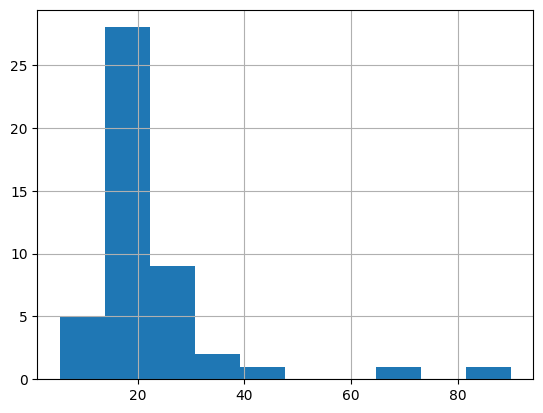

In [ ]:
df['Cena'].hist()